<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [5]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [6]:
## Write your code here
# Makes a dataframe for repeated rows
df_duplicate_rows = df[df.duplicated()]

# Returns total count of duplicated rows and prints total
duplicate_count = len(df_duplicate_rows)
print('Number of duplicated rows from dataset:', duplicate_count)
print('Number of rows in original dataset:', len(df))

# Dropping duplicates
df_cleaned = df.drop_duplicates()
print('Number of rows in cleaned dataset:', len(df_cleaned))

Number of duplicated rows from dataset: 20
Number of rows in original dataset: 65457
Number of rows in cleaned dataset: 65437


### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [7]:
## Write your code here
df_cleaned['CodingActivities'].isnull().value_counts()

CodingActivities
False    54466
True     10971
Name: count, dtype: int64

Total missing values in CodingActivities: 10971 rows

##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [8]:
## Write your code here
# Performing Forward Fill on Coding Activities
df_cleaned.loc[:,'CodingActivities'] = df_cleaned['CodingActivities'].ffill()

# Check on values filled
df_cleaned['CodingActivities'].isnull().value_counts()

CodingActivities
False    65437
Name: count, dtype: int64

With check, all rows in CodingActivities returned false for null. All rows are filled successfully.

**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [9]:
## Write your code here
# Dropping rows with empty values in ConvertedCompYearly & remove <= 0 values
df_compyear = df_cleaned[(df_cleaned['ConvertedCompYearly'].notnull()) & (df_cleaned['ConvertedCompYearly'] > 0)].copy()

print('Full length of ConvertedCompYear:', len(df_cleaned['ConvertedCompYearly']))
print('Filtered length of ConvertedCompYear:',len(df_compyear))

Full length of ConvertedCompYear: 65437
Filtered length of ConvertedCompYear: 23435


Due to the nature of the distribution, it was decided that ConvertedCompYearly is better for use with normal distribution. Table for describe() is available:

|        |  CompTotal    | ConvertedCompYearly |
|--------|:-------------:|:-------------------:|
| count  | 3.374000e+04  |	  2.343500e+04     |
| mean	 | 2.963841e+145 |	  8.615529e+04     |
| std    | 5.444117e+147 |	  1.867570e+05     |
| min	 | 0.000000e+00  |	  1.000000e+00     |
| 25%	 | 6.000000e+04  |	  3.271200e+04     |
| 50%	 | 1.100000e+05  |	  6.500000e+04     |
| 75%	 | 2.500000e+05  |	  1.079715e+05     |
| max	 | 1.000000e+150 |	  1.625660e+07     |

CompTotal min is 0, max is 1xe^150, suggesting bad data. To use the data for ConvertedCompYearly, we will drop all other empty rows as to not skew the data further and just use the available 23k values. 

##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [10]:
## Write your code here
# Getting minimum and maximum values from column
min_value = df_compyear['ConvertedCompYearly'].min()
max_value = df_compyear['ConvertedCompYearly'].max()

# Applying Min-Max Scaling
df_compyear['ConvertedCompYearly_Normalized'] = (
    (df_compyear['ConvertedCompYearly'] - min_value) / (max_value - min_value))

# Printing first 5 rows to check values
df_compyear['ConvertedCompYearly_Normalized']

72       0.000450
374      0.001850
379      0.005616
385      0.003303
389      0.006766
           ...   
41180    0.002746
41184    0.010457
41185    0.007187
41186    0.000738
41187    0.013707
Name: ConvertedCompYearly_Normalized, Length: 23435, dtype: float64

##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [11]:
## Write your code here
# Getting the mean and standard deviation from column values
mean_value = df_compyear['ConvertedCompYearly'].mean()
std_value = df_compyear['ConvertedCompYearly'].std()

# Applying Z-Score Normalization
df_compyear['ConvertedCompYearly_Zscore'] = (df_compyear['ConvertedCompYearly'] - mean_value) / (std_value)

# Printing first 5 rows to check values
df_compyear['ConvertedCompYearly_Zscore']

72      -0.422117
374     -0.300290
379      0.027521
385     -0.173767
389      0.127678
           ...   
41180   -0.222296
41184    0.448951
41185    0.164324
41186   -0.397068
41187    0.731853
Name: ConvertedCompYearly_Zscore, Length: 23435, dtype: float64

### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


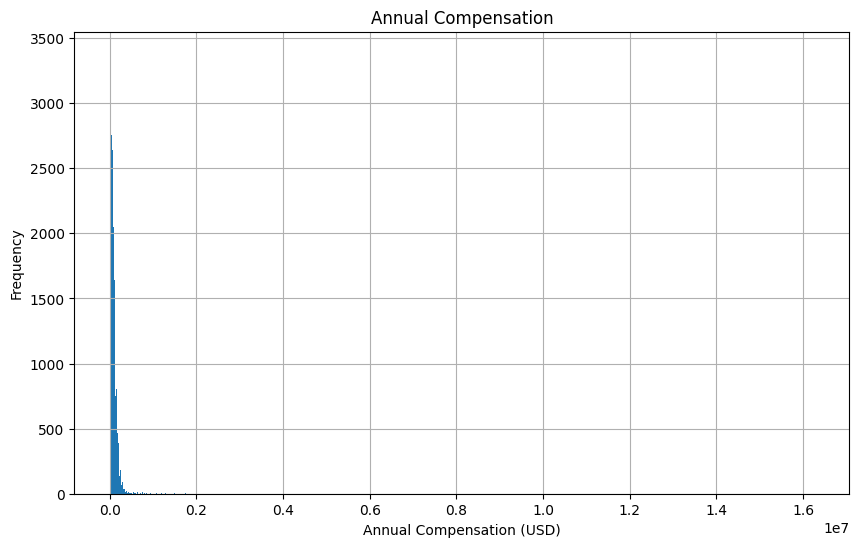

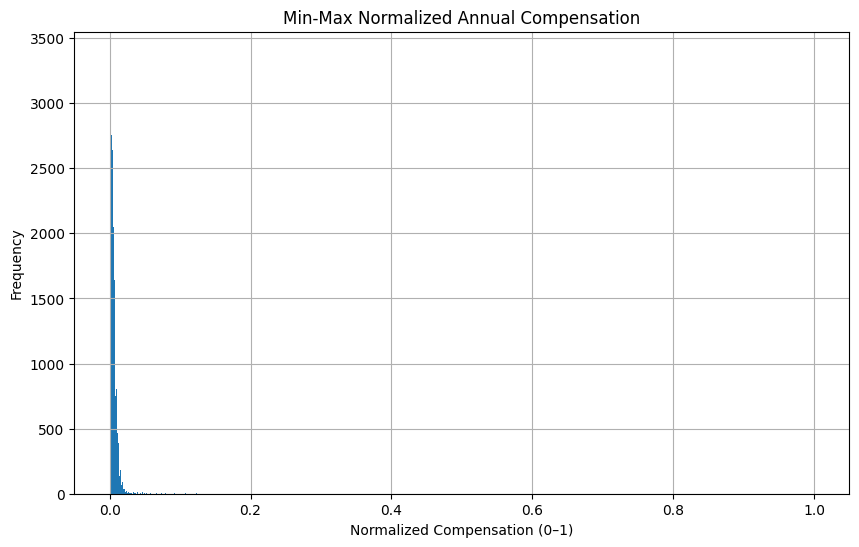

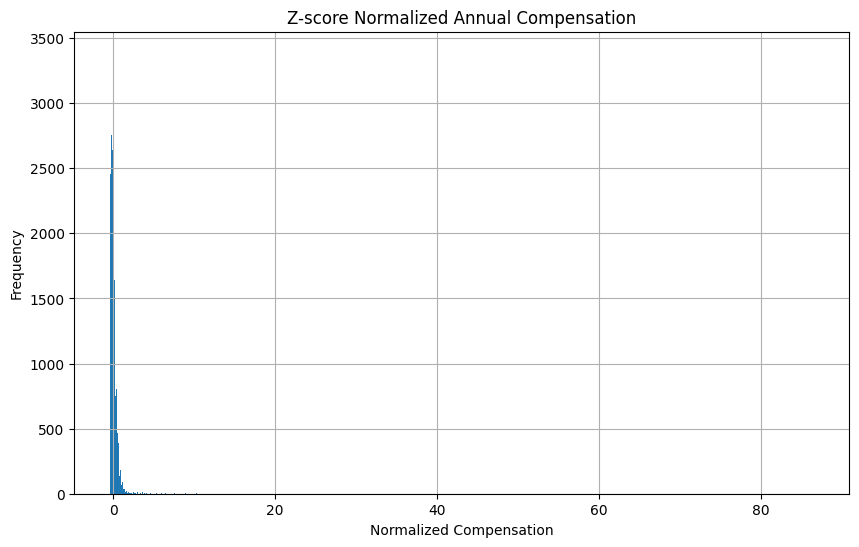

In [12]:
## Write your code here
# Plot for ConvertedCompYearly
plt.figure(figsize=(10,6))
df_compyear['ConvertedCompYearly'].hist(bins=1000)
plt.title('Annual Compensation')
plt.xlabel('Annual Compensation (USD)')
plt.ylabel('Frequency')
plt.show()

# Plot for Min-Max Normalization
plt.figure(figsize=(10,6))
df_compyear['ConvertedCompYearly_Normalized'].hist(bins=1000)
plt.title('Min-Max Normalized Annual Compensation')
plt.xlabel('Normalized Compensation (0–1)')
plt.ylabel('Frequency')
plt.show()

# Plot for Z-score Normalization
plt.figure(figsize=(10,6))
df_compyear['ConvertedCompYearly_Zscore'].hist(bins=1000)
plt.title('Z-score Normalized Annual Compensation')
plt.xlabel('Normalized Compensation')
plt.ylabel('Frequency')
plt.show()

Due to the data being skewed drastically to lower values, we would have to change strategy with how to handle the data. Removing the higher values from the data will provide a better visual overall, but more processing will have to be completed to do so. That includes redoing the calculations on the new max (which is within the 99 percentile of the data). By putting the bins at 1000, we can finally see that some of the data ia about to break away but not enough for a clean graphic. Going higher in the bins will not improve it, and reducing it will combine the data closer together, showing nothing but a single line.

Below will be better visual with filtering of extreme highs and lows, recalculating the normalization based on filtered data for cleaner visuals. 

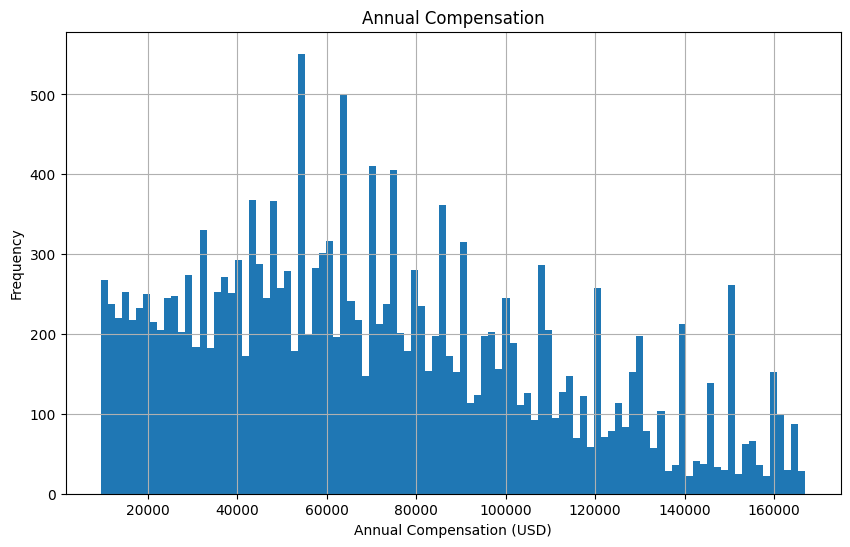

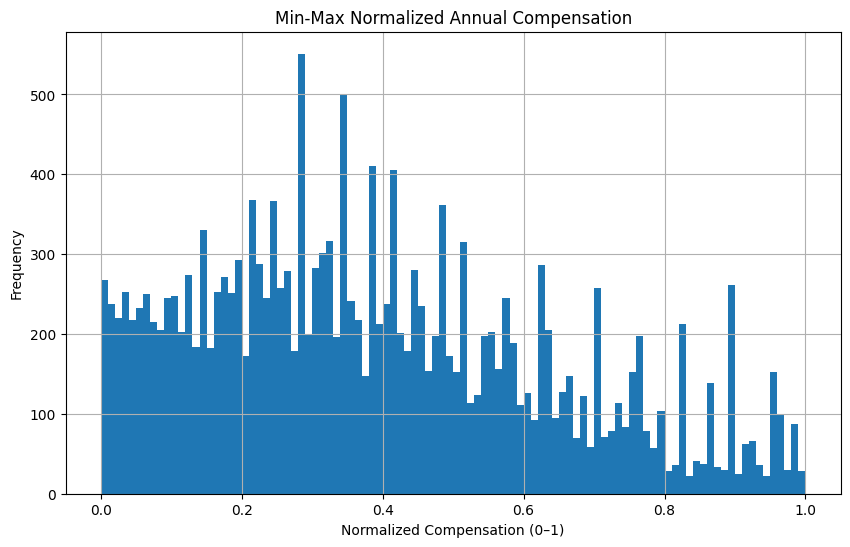

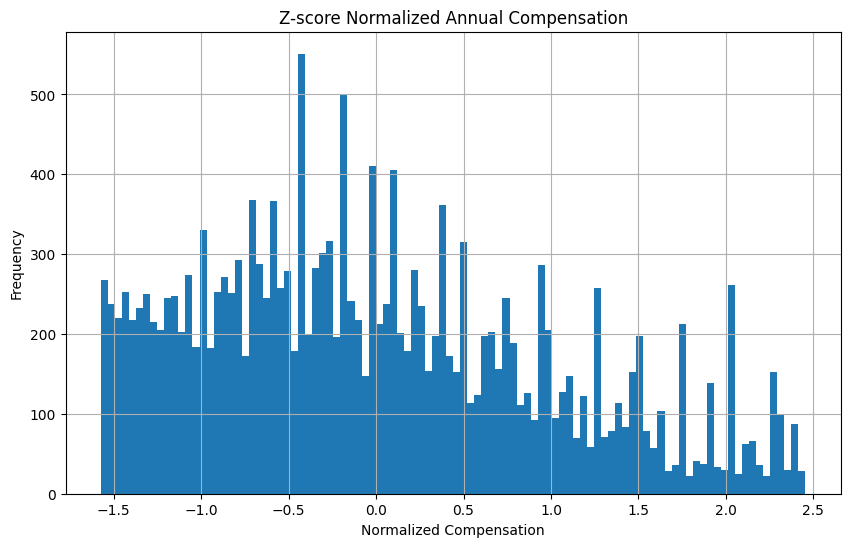

In [13]:
## Write your code here
# Setting filters to avoid left-skewed graphs
lower = df_compyear['ConvertedCompYearly'].quantile(0.10)
upper = df_compyear['ConvertedCompYearly'].quantile(0.90)

# Assigning new df for graphing
filtered_data = df_compyear[(df_compyear['ConvertedCompYearly']>= lower) & (df_compyear['ConvertedCompYearly'] <= upper)].copy()

# Recalculating normalizations
# Min-Max
# Getting minimum and maximum values from column
min_value = filtered_data['ConvertedCompYearly'].min()
max_value = filtered_data['ConvertedCompYearly'].max()

# Applying Min-Max Scaling
filtered_data['ConvertedCompYearly_Normalized'] = (
    (filtered_data['ConvertedCompYearly'] - min_value) / (max_value - min_value))

# Z-score
# Getting the mean and standard deviation from column values
mean_value = filtered_data['ConvertedCompYearly'].mean()
std_value = filtered_data['ConvertedCompYearly'].std()

# Applying Z-Score Normalization
filtered_data['ConvertedCompYearly_Zscore'] = ((filtered_data['ConvertedCompYearly'] - mean_value) / (std_value))

# Plot for ConvertedCompYearly
plt.figure(figsize=(10,6))
filtered_data['ConvertedCompYearly'].hist(bins=100)
plt.title('Annual Compensation')
plt.xlabel('Annual Compensation (USD)')
plt.ylabel('Frequency')
plt.show()

# Plot for Min-Max Normalization
plt.figure(figsize=(10,6))
filtered_data['ConvertedCompYearly_Normalized'].hist(bins=100)
plt.title('Min-Max Normalized Annual Compensation')
plt.xlabel('Normalized Compensation (0–1)')
plt.ylabel('Frequency')
plt.show()

# Plot for Z-score Normalization
plt.figure(figsize=(10,6))
filtered_data['ConvertedCompYearly_Zscore'].hist(bins=100)
plt.title('Z-score Normalized Annual Compensation')
plt.xlabel('Normalized Compensation')
plt.ylabel('Frequency')
plt.show()

As we can see from the above graphs, all the graphs are still the same shape. I have attempted multiple modifications but it would not get a proper shape requeired as bell istributions should be. This is due to salary data in general are all skewed, since the survey was conducted on a world-wide scale, with inclusion of employed and unemployed and such, this will make hard work to make a shape unless filtering the data down to including another factor like education level, employment, location and any of the other data points available.

### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
